# ELM463
## LAB00
### Written by Alperen Arslan

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import array, int32

### Task 1 - PGM Write

In [70]:
# Description:
#
# Write given matrix to PGM file
#
# @param[1]: Image matrix. It must be consist of pixel values.
# @param[2]: Filename. It is name of PGM file that wants to be create.
# @param[3]: Width. Width value of the image.
# @param[4]: Height. Height value of the image.
# @param[5]: Magic Number. Magic number is identifies the file type. PGM file type is P5. Default define is P5.
# @param[6]: Resolution. The value of maximum pixel value. Default define is 255.
#
# @return: No return
def pgmwrite(img, filename, width, height, magicNum='P5', resolution=255):
    # Transform given image array to list
    img = int32(img).tolist()
    
    # Create pmg file
    f = open(filename,'w', encoding="utf-8")
    
    # Header struct
    # P5\n (or P2 / Magic Number)
    # 512 512\n (Width and height value, blank space between these number)
    # 256\n (Resolution value)
    # Data (Binary format)
        
    # Write header to pmg file
    f.write(str(magicNum) + '\n')
    f.write(str(width) + ' ' + str(height) + '\n')
    f.write(str(resolution) + '\n')
    
    # Write data to pmg file
    for i in range(height):
        for j in range(width):
            f.write(chr(img[i][j]))
    f.close()

In [71]:
im = [[101, 102, 103], [104, 105, 106], [107, 108, 109]]
pgmwrite(im,'test.pgm',3,3)

### Task 2 - PGM Read

In [72]:
# Description:
#
# Read given matrix to PGM file
#
# @param[1]: Filename. It is name of PGM file that wants to read.
#
# @return[1]: Image Data. The values of image pixels.
# @return[2]: Magic Number. Magic number is identifies the file type. PGM file type is P5. Default define is P5.
# @return[3]: Width. Width value of the image.
# @return[4]: Height. Height value of the image.
# @return[5]: Resolution. The value of maximum pixel value.
#
def pgmread(filename):
    # Open pgm file with binary reading
    f = open(filename,'rb')
    
    # Read all the pgm file
    imageBinary = f.read()

    # Header struct
    # P5\n (or P2 / Magic Number)
    # 512 512\n (Width and height value, blank space between these number)
    # 256\n (Resolution value)
    # Data (Binary format)
    
    # Define variables for header reader while loop
    lineCounter = 0
    cursorIndex = 0
    buffer = ''     # Reading buffer
    magicNum = ''   # Magic number info
    width = ''      # Height info
    height = ''     # Width info
    resolution = '' # Resolution info
    
    # Reading the header struct of pgm file
    # Skip all comments
    # Just read magic number, width, height and resolution
    # Boundry for line number, because of header struct consist of three lines
    while lineCounter < 3:
        # Read binary till encounter the line feed
        # It means, it read one line
        if (chr(imageBinary[cursorIndex]) == '\n'):
            if(lineCounter == 2): # Resolution info
                resolution = buffer
                lineCounter = lineCounter + 1 # Increase line counter
                buffer = '' # Clean buffer
            if (lineCounter == 1): # Width and height info
                [width,height] = buffer.split(' ') # Split buffer to take width and height infos
                lineCounter = lineCounter + 1
                buffer = ''
            if (lineCounter == 0): # Magic num info
                magicNum = buffer
                lineCounter = lineCounter + 1
                buffer = ''
            cursorIndex = cursorIndex + 1
        # Comment skipper block
        if (chr(imageBinary[cursorIndex]) == '#'):
            comment_check = True
            # Skip bytes till encounter line feed and there is no more comment
            while comment_check:
                if (chr(imageBinary[cursorIndex]) == '\n') and (chr(imageBinary[cursorIndex+1]) != '#'):comment_check = False
                cursorIndex = cursorIndex + 1
            buffer = ''
        buffer = buffer + chr(imageBinary[cursorIndex]) # Add bytes to buffer
        cursorIndex = cursorIndex + 1 # Increase cursor index to take next byte to buffer

    # Add rest of the pgm bytes to data vector
    imageData = imageBinary[cursorIndex-1:]
    
    # Return the result
    return (imageData,magicNum,int(width),int(height),int(resolution))

Magic Num: P5
Width: 3
Height: 3
Resolution: 255


Image Matrix: 

[[101 102 103]
 [104 105 106]
 [107 108 109]]




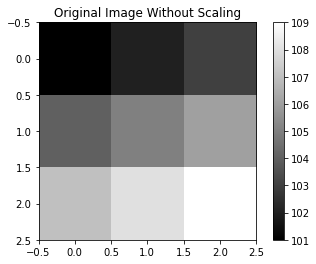

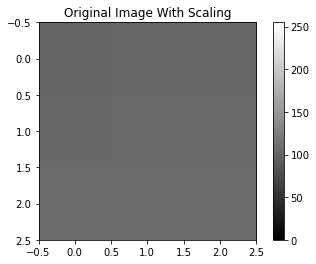

In [73]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('test.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print('\n')

# Convert image string to byte matrix
image = bytearray(image)    
image = list(image)
image = np.array(image)
image = np.reshape(image,(height,width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print('\n')

# Show image
plt.figure()
plt.title('Original Image Without Scaling')
plt.imshow(image, cmap="gray")
plt.colorbar()

# Show image
plt.figure()
plt.title('Original Image With Scaling')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

### Task 3

Magic Num: P5
Width: 512
Height: 512
Resolution: 255


Image Matrix: 

[[162 162 162 ... 169 154 124]
 [162 162 162 ... 169 154 124]
 [162 162 162 ... 169 154 124]
 ...
 [ 27  27  35 ...  97  92  91]
 [ 28  28  40 ...  97  98 102]
 [ 28  28  40 ...  97  98 102]]




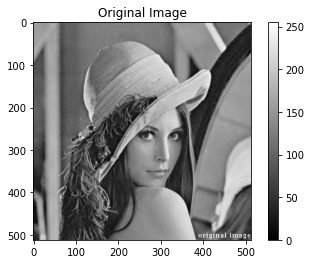

In [74]:
# Add image file
[image,magicNum,width,height,resolution] = pgmread('lena.pgm')

# Image infos
print('Magic Num:',magicNum)
print('Width:',width)
print('Height:',height)
print('Resolution:',resolution)
print('\n')

# Convert image string to byte matrix
image = bytearray(image)    
image = list(image)
image = np.array(image)
image = np.reshape(image,(height,width))

# Image byte matrix info
print('Image Matrix: \n')
print(image)
print('\n')

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap="gray", vmin=0, vmax=255)
plt.colorbar()

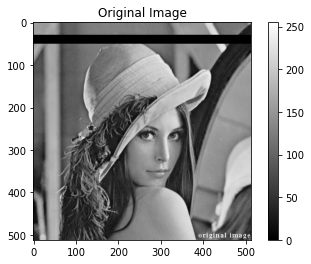

In [75]:
newImage = image # New image buffer

for heightIndex in range(height):
    for widthIndex in range(width):
        if(heightIndex >= 30 and heightIndex <=50):
            newImage[heightIndex][widthIndex] = 0

# Show image
plt.figure()
plt.title('Original Image')
plt.imshow(newImage, cmap="gray")
plt.colorbar()

# Saving Image
pgmwrite(newImage,'myLena.pgm',width,height)